# Popularity Based Movie Recommendation System

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
keywords_df = pd.read_csv('keywords.csv')
metadata = pd.read_csv('movies_metadata.csv')
ratings_df = pd.read_csv('ratings_small.csv')
links = pd.read_csv('links.csv')


E:\programs\anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print("Shape of keywords df:", keywords_df.shape)
print("Shape of ratings df:", ratings_df.shape)
print("Shape of links df:", links.shape)
print("Shape of metadata df:", metadata.shape)


Shape of keywords df: (46419, 2)
Shape of ratings df: (100004, 4)
Shape of links df: (45843, 3)
Shape of metadata df: (45466, 24)


In [3]:
keywords_df.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [4]:
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [6]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


### EDA

In [4]:
# checking the metadata dataframe columns
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

#### Combining the necessary and important features 

Function to extract the imdb id from the *imdb_id* in metadata dataframe

In [3]:
def getId(str):
    while len(str)>3:
        return int(str[3:])

In [4]:
import ast
df = pd.merge(links, ratings_df, on='movieId')
# selecting the features from metadata df
md = metadata[['genres', 'imdb_id', 'original_title',
               'popularity', 'production_countries', 'release_date', 'original_language', 'spoken_languages','vote_average', 'vote_count', 'revenue', 'budget']]
# renaming the imdb id column for merdging
md = md.rename(columns={'imdb_id':'imdbId'})
# object to str conversion
md['imdbId'] = md['imdbId'].astype(str)
# extracting the imdb ids
md['imdbId'] = md['imdbId'].apply(getId)
df2 = pd.merge(df, md, on='imdbId')
# clean and extract the genres
df2['genres'] = df2['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
# clean and extract the spoken language
df2['spoken_languages'] = df2['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
# clean and extract the production country
df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])
# convert the release date to only year
df2['release_year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
# data type conversion of some features
df2['release_year'] = df2['release_year'].astype('int')
df2['vote_count'] = df2['vote_count'].astype('int')
df2['vote_average'] = df2['vote_average'].astype('int')
df2['original_language'] = df2['original_language'].astype('str')
df2['revenue'] = df2['revenue'].astype('int')
df2['budget'] = df2['budget'].astype('int')

df2 = df2.drop(['release_date'], axis=1)
df2.head()


,movieId,imdbId,tmdbId,userId,rating,timestamp,genres,original_title,popularity,production_countries,original_language,spoken_languages,vote_average,vote_count,revenue,budget,release_year
0,1,114709,862.0,7,3.0,851866703,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
1,1,114709,862.0,9,4.0,938629179,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
2,1,114709,862.0,13,5.0,1331380058,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
3,1,114709,862.0,15,2.0,997938310,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995
4,1,114709,862.0,19,3.0,855190091,"[Animation, Comedy, Family]",Toy Story,21.946943,[United States of America],en,[English],7,5415,373554033,30000000,1995


#### Highest rated movies by genre and year

Function to return the ratings of the movies that takes genre and year as input.

In [25]:
def getRatings(genre, year, topCount):
    # considering only those whose revenue is above 85 percentile
    temp = df2[(df2.release_year >= year) & (df2.genres.apply(lambda x: genre in x)) & (df2.revenue > df2.revenue.quantile(0.85))]
    # grouping by movie names and sorting them in descending order
    rating = temp.groupby('original_title')['rating'].mean().sort_values(ascending=False)
    return rating[:topCount]


In [26]:

getRatings('Action', 2010, 10)

original_title
The Avengers                          4.010870
Warcraft                              4.000000
Ant-Man                               3.794118
Life of Pi                            3.772727
Captain America: The First Avenger    3.659091
The Hobbit: An Unexpected Journey     3.520000
Jurassic World                        3.444444
Thor                                  3.357143
The Amazing Spider-Man                3.325000
Man of Steel                          2.954545
Name: rating, dtype: float64

**Barplot** of the top rated action movies

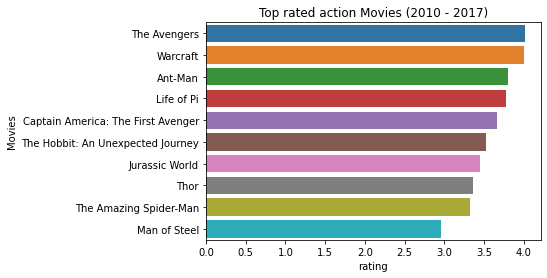

In [41]:
plt.figure()
sns.barplot(x=getRatings('Action', 2010, 10),
            y=getRatings('Action', 2010, 10).index)
plt.title("Top rated action Movies (2010 - 2017)")
plt.xlabel('rating')
plt.ylabel('Movies')
plt.show()


**Barplot** of the top rated animated movies

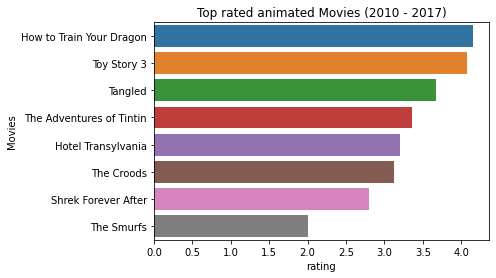

In [43]:
plt.figure()
sns.barplot(x=getRatings('Animation', 2010, 10),
            y=getRatings('Animation', 2010, 10).index)
plt.title("Top rated animated Movies (2010 - 2017)")
plt.xlabel('rating')
plt.ylabel('Movies')
plt.show()


- **The Avengers, Warcraft, Ant-Man** are some of the top rated movies 

#### Vote Count by language

Function to count the number of votes filtered by language

In [23]:
def getVotesByLanguage(year,topCount):
    temp = df2[(df2.release_year >= year)]
    rating = temp.groupby('original_language')[
        'vote_count'].count().sort_values(ascending=False)
    return rating[:topCount]


**Barplot** vote count by language

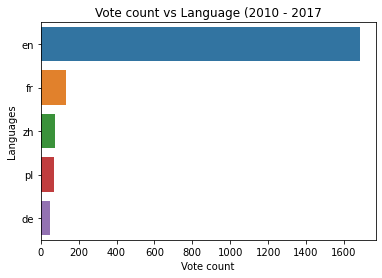

In [35]:
plt.figure()
sns.barplot(x=getVotesByLanguage(2010, 5), y=getVotesByLanguage(2010, 5).index)
plt.title("Vote count vs Language (2010 - 2017")
plt.xlabel('Vote count')
plt.ylabel('Languages')
plt.show()


- English has the highest number of vote counts
- Followed by French

This shows the popularity and reach of the **English** language in the cinema industry. And more number of votes indicates more viewers and consumers' interaction with the movie. Since **English** has more viewers and popularity, movies made in **English** language will make more profit.

#### Movie Profit

Funtion to find the profit of the movies based on their genre and release year

In [29]:
def getProfitByLanguage(year, genre, topCount):
    # considering only those whose budget is more than 0
    temp = df2[(df2.release_year >= year) & (df2.budget > 0)& (df2.genres.apply(lambda x : genre in x))][['budget','revenue','original_title']]
    # A very basic money return calculation
    temp['profit'] = temp['revenue'] - temp['budget']
    temp['profit'] = (temp['profit']/temp['budget'])*100
    return temp.groupby('original_title')['profit'].mean().sort_values(ascending=False)[:topCount]


In [49]:
getProfitByLanguage(2010, 'Animation', 10)

original_title
Toy Story 3                 433.484852
Gnomeo & Juliet             426.978978
The Smurfs                  412.499385
Shrek Forever After         356.121738
The Croods                  333.465873
Hotel Transylvania          321.618356
How to Train Your Dragon    199.926521
The Adventures of Tintin    186.107747
Epic                        168.426634
Tangled                     127.613437
Name: profit, dtype: float64

**Barplot** of profit of the movies filtered by *genre* and *year*

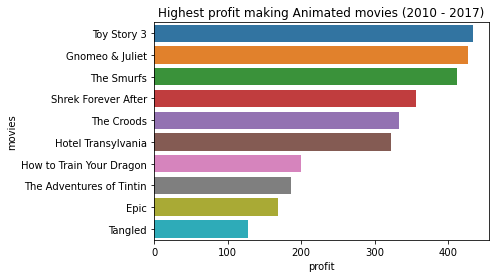

In [36]:
plt.figure()
sns.barplot(x=getProfitByLanguage(2010, 'Animation', 10),
            y=getProfitByLanguage(2010, 'Animation', 10).index)
plt.title("Highest profit making Animated movies (2010 - 2017)")
plt.xlabel('profit')
plt.ylabel('movies')
plt.show()


- **Toy Story 3** has the highest profit value in the animation genre

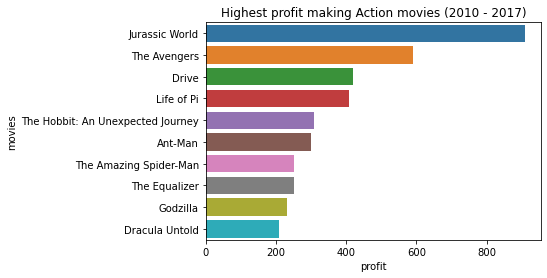

In [40]:
plt.figure()
sns.barplot(x=getProfitByLanguage(2010, 'Action', 10),
            y=getProfitByLanguage(2010, 'Action', 10).index)
plt.title("Highest profit making Action movies (2010 - 2017)")
plt.xlabel('profit')
plt.ylabel('movies')
plt.show()


- **Jurassic World** and **The Avengers** are the top profit makers in action category.

### Data Preprocessing

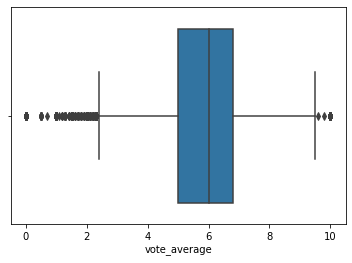

In [17]:
# Checking the spread of the average vote column using Boxplot
plt.figure()
sns.boxplot(x = metadata['vote_average'])
plt.show()

In [8]:
# Taking the vote counts and avg no of votes
vote_counts = df2['vote_count']

vote_averages = df2['vote_average']

avg_vote = vote_averages.median()

# considering 95th percentile cutoff for the vote counts
counts = vote_counts.quantile(0.95)
print('The average count of the number of votes: ',avg_vote)
print('The cutoff vote counts: ',counts)


The average count of the number of votes:  6.0
The cutoff vote counts:  5758.0


Considering the cutoff vote counts as the lower limit for the final data preprocessing.

In [9]:
# final data for processing
data = df2[(df2['vote_count'] >= counts) &
               (df2['vote_count'].notnull()) &
               (df2['vote_average'].notnull())][['movieId', 'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp',
                                                 'genres', 'original_title', 'popularity', 'production_countries',
                                                 'original_language', 'spoken_languages', 'vote_average', 'vote_count',
                                                 'revenue', 'budget', 'release_year']]
                                                
# converting the vote_count and avg_vote column to int data type
data.shape


(4840, 17)

In [44]:
data.release_year.unique()

array([1995, 1977, 1994, 1972, 1980, 1985, 1997, 1999, 2001, 2002, 2003,
       2004, 2005, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [12]:
data.head(2)

,movieId,imdbId,tmdbId,userId,rating,timestamp,genres,original_title,popularity,production_countries,original_language,spoken_languages,vote_average,vote_count,revenue,budget,release_year
2471,47,114369,807.0,2,4.0,835355552,"[Crime, Mystery, Thriller]",Se7en,18.45743,[United States of America],en,[English],8,5915,327311859,33000000,1995
2472,47,114369,807.0,8,5.0,1154464836,"[Crime, Mystery, Thriller]",Se7en,18.45743,[United States of America],en,[English],8,5915,327311859,33000000,1995


In [10]:
# function to calculate the rating metric (weighted rating) 
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+counts) * R) + (counts/(counts+v) * avg_vote)


In [11]:
data['wt_rating'] = data.apply(weighted_rating, axis=1)

### Movie prediction

Considering the *weighted rating* value for finding the top most rated movies of all time.

In [12]:
# Sorting the movies based on the weighted rating value
def predictTopMovies(topCount):
    return data.groupby('original_title')['wt_rating'].mean().sort_values(ascending=False)[:topCount]

In [16]:
predictTopMovies(10)

original_title
The Dark Knight                                      7.361180
Interstellar                                         7.320389
Fight Club                                           7.253952
The Lord of the Rings: The Fellowship of the Ring    7.213925
Pulp Fiction                                         7.201830
The Shawshank Redemption                             7.184188
The Lord of the Rings: The Return of the King        7.176487
Forrest Gump                                         7.171809
The Lord of the Rings: The Two Towers                7.140533
Star Wars                                            7.081366
Name: wt_rating, dtype: float64

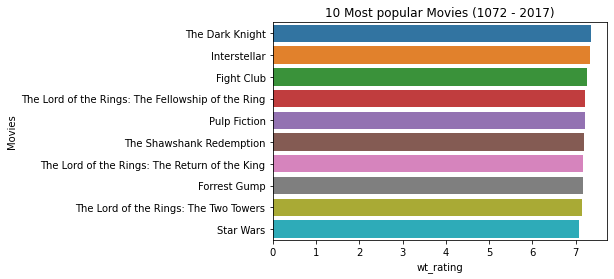

In [46]:
plt.figure()
sns.barplot(x=predictTopMovies(10), y=predictTopMovies(10).index)
plt.title("10 Most popular Movies (1072 - 2017)")
plt.xlabel('wt_rating')
plt.ylabel('Movies')
plt.show()


This shows, that **The Dark Knight**, **Intersteller**, **Fight Club** are the top most popular movies of all time.

### Movie prediction - considering the genre

Predicting the top rated moives of all time based on a specific genre.

In [19]:
def predictTopMoviesByGenre(topCount, genre):
    temp = data[(data.genres.apply(
        lambda x: genre in x))]
    top = temp.groupby('original_title')[
        'wt_rating'].mean().sort_values(ascending=False)
        # topCount is the top number of output the user wants
    return top[:topCount]


In [20]:
predictTopMoviesByGenre(10, 'Action')

original_title
The Dark Knight                                      7.361180
The Lord of the Rings: The Fellowship of the Ring    7.213925
The Lord of the Rings: The Return of the King        7.176487
The Lord of the Rings: The Two Towers                7.140533
Star Wars                                            7.081366
The Empire Strikes Back                              7.020415
Avatar                                               6.677820
The Avengers                                         6.675752
The Matrix                                           6.611916
Iron Man                                             6.608539
Name: wt_rating, dtype: float64

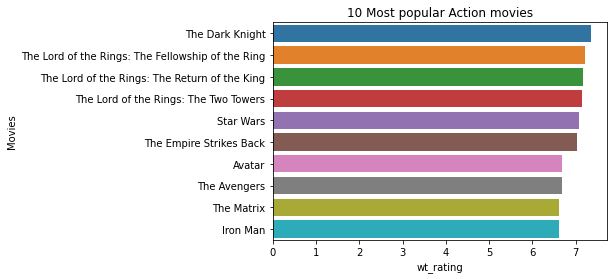

In [47]:
plt.figure()
sns.barplot(x=predictTopMoviesByGenre(10, 'Action'), y=predictTopMoviesByGenre(10, 'Action').index)
plt.title("10 Most popular Action movies")
plt.xlabel('wt_rating')
plt.ylabel('Movies')
plt.show()


- **The Dark Knight, The Lord of the Rings series and The Star Wars** series are some of the top rated action movies of all time.